In [ ]:
import os
os.chdir('/het/p4/ramirez/gcewavelets/skysearch/code/')

In [152]:
import numpy as np
import sys, os
import _maps as maps

In [153]:
import healpy as hp
import astropy_healpix

In [154]:
import matplotlib.pyplot as plt

In [155]:
# load local directory
username="ramirez"
local_dir = "/het/p4/"+username+"/gcewavelets/skysearch/"
maps_dir = "/het/p4/"+username+"/gcewavelets/skysearch/data/maps/"

# ---
 # Block: Specify map ids 
map_dir = maps_dir + 'map_test/'
data_dir = map_dir + 'projected_maps/' 
# ---

# load father pixel and data
npix = np.random.randint(192)
patch_dir = data_dir + 'map_' + str(npix) + '/'

In [161]:
a_deg = 0.6
str_a_deg = str.format('{0:.5f}',a_deg)

wavelet_name = 'mexh'
grid_scale_deg = 0.4 
str_grid_scale_deg = str.format('{0:.4f}',grid_scale_deg)
file_name = wavelet_name + '_' + 'coefficient_map' + '_' + str_a_deg + '_' + str_grid_scale_deg + '.npy'
coefficients = np.load(patch_dir + file_name, allow_pickle = True)

In [162]:
projected_map = dict(np.load(patch_dir + 'projected_map_dict_with_grid.npz'))

data = projected_map['outmost_region_points']
data = np.swapaxes(data, -1, -2).copy()
mesh_bxby = projected_map['rectangular_grid']
grid = projected_map['grid']

In [163]:
r_out_edge = projected_map['outer_region_edge']
x_out_edge = r_out_edge[:,0] ; y_out_edge = r_out_edge[:,1]
bx_min, bx_max, by_min, by_max = [np.min(x_out_edge), np.max(x_out_edge),
                                  np.min(y_out_edge), np.max(y_out_edge)]

In [164]:
scale = 0.4 * np.pi / 180
step_size = scale 
mesh_bxby, arr_b, arr_bx_plot, arr_by_plot = maps.build_mesh_(bx_min, bx_max, by_min, by_max, step_size, step_size, return_arrays_for_plotting=True)

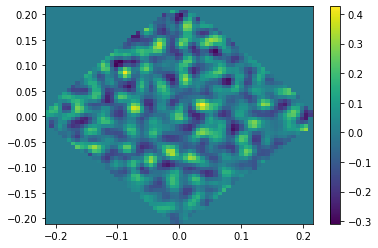

In [165]:
plt.pcolormesh(arr_bx_plot, arr_by_plot, coefficients[:,:,0])
plt.colorbar()